Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/02_Regression'
except ImportError as e:
    pass

We will use a simple dataset about fish for the introduction of regression:

In [2]:
import pandas as pd

fish = pd.read_csv('fish.csv')
fish.head()

,age,temp,weight,length
0,14,25,100,620
1,28,25,40,1315
2,41,25,78,2120
3,55,25,99,2600
4,69,25,163,3110


Lets have a look at some plots to determine how the weight and length of the fish are related to the age.
A nice function for this is contained in the [`scatter_matrix` function in pandas](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html).  

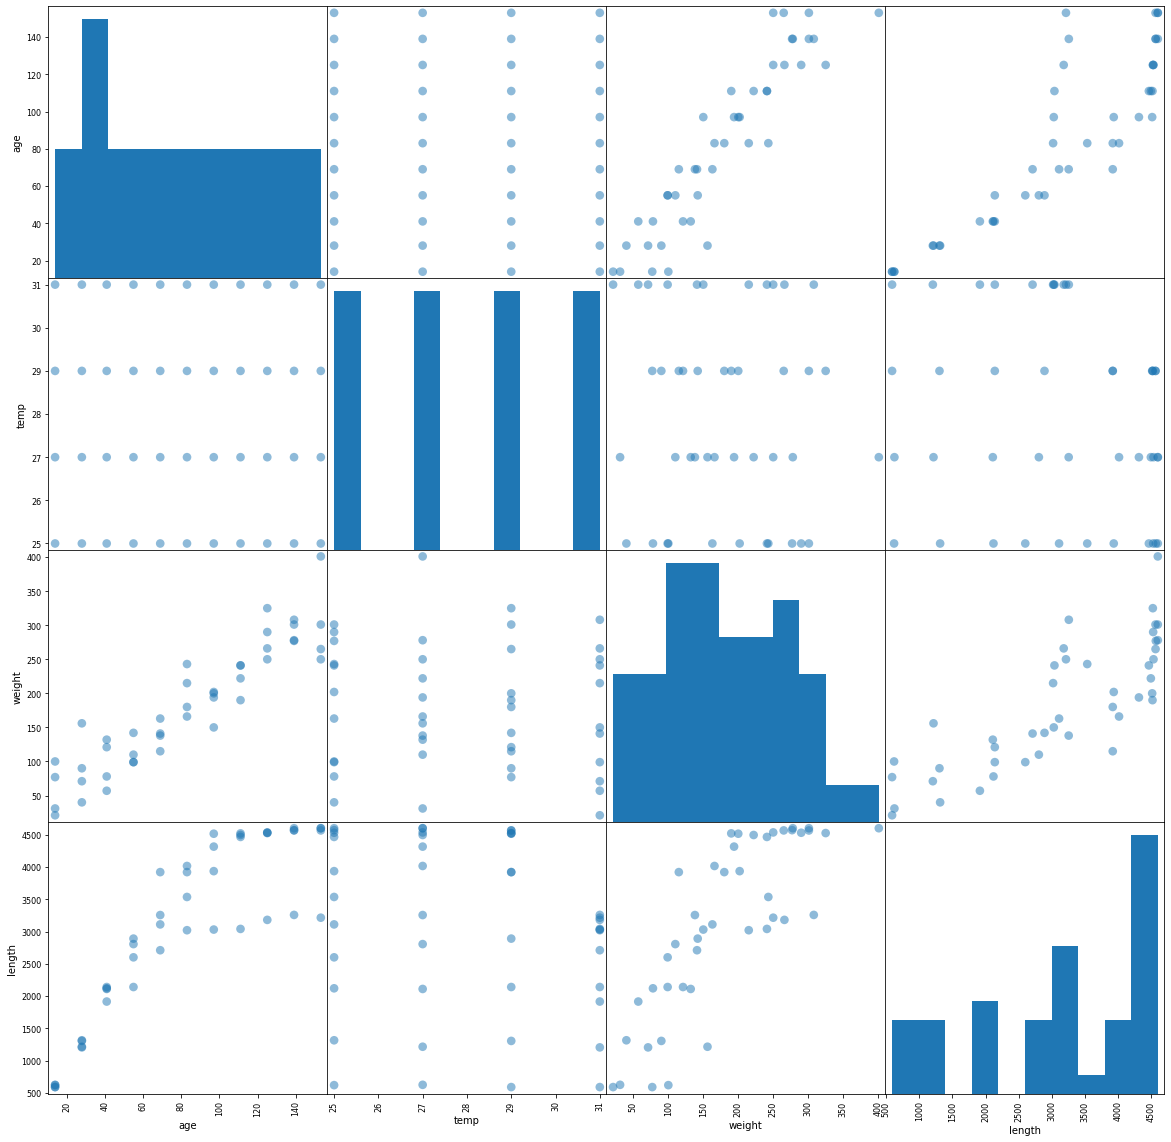

In [3]:
pd.plotting.scatter_matrix(fish, figsize=(20, 20), s=300); #s makes 

It is also possible to create the same plot with matplotlib.
Following the corresponding code:

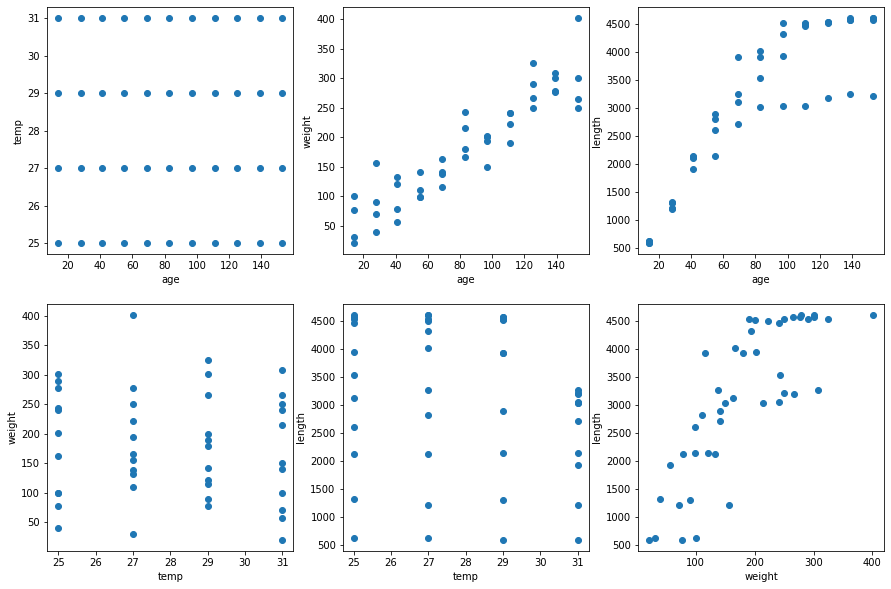

In [4]:
import itertools
import matplotlib.pyplot as plt

# create a list of all columns that we are considering
features = [ 'age', 'temp', 'weight', 'length' ]

# create all combinations of considered columns
combinations = itertools.combinations(features, 2)

# create a figure and specify its size
fig = plt.figure(figsize=(15,10))

# go through all combinations and create one plot for each
figure_index = 1
for combination in combinations:
    # add a sub plot to the figure
    axs = fig.add_subplot(2,3,figure_index)
  
    # plot the feature combination
    axs.scatter(fish[combination[0]], fish[combination[1]])
  
    # set the axis labels of the current sub plot
    axs.set_xlabel(combination[0])
    axs.set_ylabel(combination[1])
      
    # increase the figure index (otherwise all plots are drawn in the first subplot)
    figure_index+=1

plt.show()

It seems that there is a linear relationship between age and weight. We can fit a linear regression and add it to the plot. We use the age as a feature and the weight as target variable.

### Train / Test split

If we only have a single dataset available, we have to split the data for evaluation. This is called a 'train/test split' and provided by the function with the same name in scikit-learn: [```train_test_split()```](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Parameters:
- ```test_size```: percentage of the examples that should be used for the test set (default = 0.25)
- ```random_state```: if None (default), data will be split randomly each time the function is called, if an integer is passed, the same split will be performed everytime the function is called

Return values:
- training features
- test features
- training target
- test target

In [5]:
from sklearn.model_selection import train_test_split

# separate features and target variable
weight = fish['weight']

# special case: we only have one feature, so we must reshape the data here
features = fish['age'].values.reshape(-1, 1) #for only one feature
features_multi = fish[['age','length']]

# create a train/test split
weight_train, weight_test, weight_target_train, weight_target_test = train_test_split(
    features, weight, test_size=0.4, random_state=42)

In [6]:
#fish['age'].values.reshape(-1, 1)

In [7]:
#features_multi

# Introduction to scikit-learn

In this exercise we will start to look at machine learning methods. 
For these methods, we use the scikit-learn package, which provides you with many algorithms from this area.

## Machine Learning: The Problem Setting

In machine learning, we consider algorithms that take a dataset as input and 'learn' a model from this data.
The input dataset is described by `n` **examples** (= the records) which have `m` **features** (= the columns).
In this class, we will discuss two types of machine learning: supervised learning and unsupervised learning.
Supervised learning has the goal of learning a model that predicts the value of a certain attribute (the target variable) from training data, where the value of the target variable is known.
Unsupervised learning has the goal of finding and grouping similar examples (clustering) or of reducing the complexity of the data.

In this exercise we look at the regression problem which is part of supervised machine learning.

For a good introduction to the topic, have a look at the [introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html).

### Shape of the data arrays
- the data (often variable X) is always a 2D array, shape (n_samples, n_features)
- the target (not used in classifcation) is a 1D array (n_samples)

```
X:
          ----------------features------------------>
array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],    |
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],    s
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],    a
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],    m
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],    p
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],    l
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],    e
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])   |
```
```
target:
array([0, 1, 0, 1, 0, 1, 1, 1])
```

## Machine Learning in scikit-learn

In scikit-learn, machine learning algorithms are implemented in **estimators**.
Estimators usually provide the two functions ```fit()``` and ```predict()```, as well as their combination ```fit_predict()```.

### Learning and predicting (supervised)

- An **estimator** for classification is a Python object that implements the methods:
    - ```fit(X, target)```: learns the model based on training data where the value of the target variable is known
    - ```predict(T)```: applies the learned model to unseen data
    
### Clustering (unsupervised)
- one important function:
    - ```fit_predict(X)```: fits the model and returns the discovered clusters


# Regression

- Classification predicts a **categorical** value
    - a finite set of values
- Regression predicts a **numerical** value
    - a possibly infinite set of values
    - can be interpolating or extrapolating

## Regression Estimators


Linear Regression Models:
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- SGDRegressor
- [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

K-Nearest Neighbor Regression:
- [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

Decision Tree Regression:
- [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

Neural Network Regression:
- [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

Now let's fit a linear regression:

In [8]:
from sklearn.linear_model import LinearRegression

# create and fit a linear regression
weight_estimator = LinearRegression()

weight_estimator.fit(weight_train, weight_target_train)

LinearRegression()

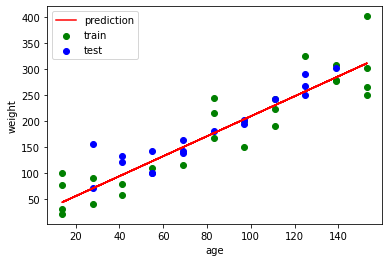

weight = 1.9201086610392861*age + 16.715220383987855


In [9]:
import matplotlib.pyplot as plt

# plot the original values
plt.scatter(weight_train, weight_target_train, c='green', label='train')
plt.scatter(weight_test, weight_target_test, c='blue', label='test')

# plot the predicted values for train and test data
plt.plot(fish['age'], weight_estimator.predict(features),c='red', label='prediction')

plt.xlabel('age')
plt.ylabel('weight')
plt.legend()
plt.show()

# print the model that was fitted (the regression formula)
print("weight = {}*age + {}".format(weight_estimator.coef_[0], weight_estimator.intercept_))

Now lets see if that also works for the length. We use the age as feature again and the length as target variable now:

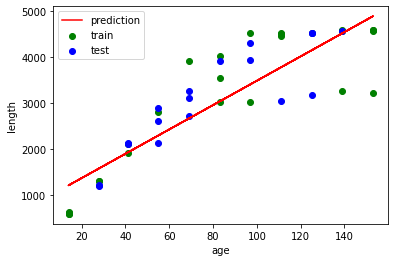

length = 26.45879282386429*age + 840.4859127674258


In [10]:
# separate features and target variable
length = fish['length']

# create a train/test split
length_train, length_test, length_target_train, length_target_test = train_test_split(
    features, length, test_size=0.4, random_state=42)

# create and fit a linear regression
length_estimator = LinearRegression()
length_estimator.fit(length_train, length_target_train)

# plot the original values
plt.scatter(length_train, length_target_train, c='green', label='train')
plt.scatter(length_test, length_target_test, c='blue', label='test')

# plot the predicted values
plt.plot(fish['age'], length_estimator.predict(features),c='red', label='prediction')

plt.xlabel('age')
plt.ylabel('length')
plt.legend()
plt.show()

# print the model that was fitted (the regression formula)
print("length = {}*age + {}".format(length_estimator.coef_[0], length_estimator.intercept_))

## Polynomial Features and Pipelines


The fitted regression does not really match the data that we see. It seems that we need a polynomial regression here. We can fit such a regression by using a [```PolynomialFeatures``` transformer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) that generates all possible feature combinations for the polynomial that we want to fit. On these transformed features, we can then use the linear regression again to fit our model:

A [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) in scikit-learn allows you to specify a sequence of transforms and a final estimator that can be executed in sequence.
This way you don't have to worry about applying the preprocessing steps (transforms) properly to each training and test split.

You create a pipeline by defining the steps that should be executed as a list.
Each element of the list is a tuple that consists of a name and the transform or estimator.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# create a transformer that generates polynomial features
# generates more features out of data 1d->2d
# inculde bias 
    # do not overfit
    # ???
transformer = PolynomialFeatures(degree=2, include_bias=False)

estimator = LinearRegression()

# preprocessing into pipeline
pipeline = Pipeline([ ('transformer', transformer), ('estimator', estimator)])

#pipeline executes all in pipeline
pipeline.fit(length_train, length_target_train)

prediction = pipeline.predict(features)

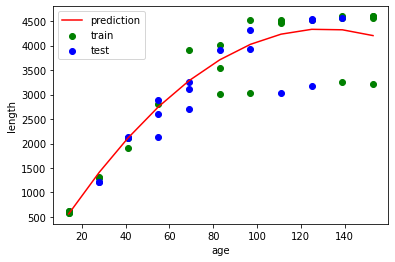

length = 72.52426890187219*age + -0.2773396272513636*age^2 + -399.1757643046544


In [12]:
# plot the original values
plt.scatter(length_train, length_target_train, c='green', label='train')
plt.scatter(length_test, length_target_test, c='blue', label='test')

# create a new dataframe that contains the age and the predictions
d = fish[['age']]
d = d.assign(prediction=prediction)

# sort the data before plotting it
d = d.sort_values(by='age')

# plot the predicted values
plt.plot(d['age'], d['prediction'], c='red', label='prediction')

plt.xlabel('age')
plt.ylabel('length')
plt.legend()
plt.show()

# print the model that was fitted (the regression formula)
print("length = ", end='')
for i, f in enumerate(pipeline.named_steps['transformer'].get_feature_names(['age'])):
    if i > 0:
        print(" + ", end='')
    print("{}*{}".format(pipeline.named_steps['estimator'].coef_[i], f), end='')
print(" + {}".format(pipeline.named_steps['estimator'].intercept_))

## Evaluation

With a continuous target variable, it does not make sense to count how often we predicted the exact correct value. The measures used for regression rather check how close our prediction is to the correct value:

In [13]:
#length_test

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# predict the values for the test data
predictions = pipeline.predict(length_test)

# evaluate using different measures
mse = mean_squared_error(length_target_test, predictions)
r2 = r2_score(length_target_test, predictions)

print("MSE:", mse)
print("RMSE:", sqrt(mse))
print("R^2:", r2)

# print the model that was fitted (the regression formula)
print("length = ", end='')
for i, f in enumerate(pipeline.named_steps['transformer'].get_feature_names(['age'])):
    if i > 0:
        print(" + ", end='')
    print("{}*{}".format(pipeline.named_steps['estimator'].coef_[i], f), end='')
print(" + {}".format(pipeline.named_steps['estimator'].intercept_))

MSE: 216093.2822413802
RMSE: 464.8583464254247
R^2: 0.8008862786225035
length = 72.52426890187219*age + -0.2773396272513636*age^2 + -399.1757643046544


### Try it  yourself
- Task 2.1.1
![xkcd comic](https://imgs.xkcd.com/comics/extrapolating.png)



## Feature Selection

- [```f_regression``` function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html)
    - Performs an [F-Test](https://en.wikipedia.org/wiki/F-test) to determine feature importances (sometimes better to decrease feature number)

- [```SelectKBest``` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)
     - selects the ```k``` best features according to ```score_func```
     
- [```SelectFwe``` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFwe.html)
    - selects all features with a p-value above ```threshold``` according to ```score_func```

- Recursive Feature Elimination: [```RFECV``` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html)
    - fits a model (any estimator that provides feature weights) and removes the ```step``` least important features
    - uses cross validation to find the optimal number of features
    
For more details, have a look at the [feature selection documentation of scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html).

For this part, we will use all features in the fish dataset:

In [15]:
# separate features and target variable
fish_target = fish['length']
fish_data = fish.drop(columns=['length'])

# create a train/test split
data_train, data_test, target_train, target_test = train_test_split(
    fish_data, fish_target,test_size=0.2, random_state=42)

Let's first try an F Regression:

In [16]:
from sklearn.feature_selection import f_regression

# create a transformer
# play with degree
# higer F = better
transformer = PolynomialFeatures(degree=3, include_bias=False)

#display(dat_set)

# run the F-Test
f, pval = f_regression(transformer.fit_transform(data_train), target_train)

# prepare a dataframe to inspect the results
stat = pd.DataFrame({ 'feature': transformer.get_feature_names(fish_data.columns), 'F value': f, 'p value': pval })
stat['p value'] = round(stat['p value'], 2)

# show the results
display(stat)

,feature,F value,p value
0,age,102.213152,0.00
1,temp,0.251619,0.62
2,weight,61.378099,0.00
3,age^2,45.118946,0.00
4,age temp,68.931617,0.00
5,age weight,43.589123,0.00
6,temp^2,0.304720,0.58
7,temp weight,48.470712,0.00
8,weight^2,30.963875,0.00
9,age^3,26.099009,0.00


In [50]:
from sklearn.feature_selection import SelectFwe

# select best features automatically
best = SelectFwe(f_regression, alpha=0.05)
transformer = PolynomialFeatures(degree=2, include_bias=False)

pipeline = Pipeline([ ('transformer', transformer), ('feature_selection', best), ('estimator', estimator)])

# fit the regression on the training data
pipeline.fit(data_train, target_train)

# predict the values for the test data
predictions = pipeline.predict(data_test)

# evaluate using different measures
mse = mean_squared_error(target_test, predictions)
r2 = r2_score(target_test, predictions)

print("MSE:", mse)
print("RMSE:", sqrt(mse))
print("R^2:", r2)

# get the selected features
selected_features = pipeline.named_steps['feature_selection'].get_support()
feature_index = 0

# print the model that was fitted (the regression formula)
for i, f in enumerate(pipeline.named_steps['transformer'].get_feature_names(fish_data.columns)):
    # check if the feature was selected
    if selected_features[i]:
        if i > 0:
            print(" + ", end='')
        # show what will be used
        print("{}*{}".format(pipeline.named_steps['estimator'].coef_[feature_index], f), end='')
        feature_index += 1
print(" + {}".format(pipeline.named_steps['estimator'].intercept_))

MSE: 106505.38631403088
RMSE: 326.3516298626849
R^2: 0.8877926080518015
165.46306711056468*age + -27.216450421307005*weight + -0.13851941150807612*age^2 + -3.1765257998776604*age temp + -0.1397143951225317*age weight + 0.8807474879564492*temp weight + 0.036332580942364245*weight^2 + -383.71501376226024


Note: sklearn pipelines do not support feature importances as of now, so we cannot use the recursive feature elimination in the same way as we used grid search! I.e., we cannot use a pipeline as an estimator for the recursive feature elimination. We can, hower, use the recursive feature elimination as an estimator inside a pipeline:

In [15]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# create a transformer and linear regression
transformer = PolynomialFeatures(degree=2, include_bias=False)
scaler = StandardScaler()
estimator = LinearRegression()

# create the feature selection estimator
# Feature Selection
# cv = crossvalidation 
    # here ask estimator - after training - how important is each feature?
feature_selection = RFECV(estimator, cv=10)

# setup the pipeline
pipeline = Pipeline([ ('transformer', transformer), ('scaler', scaler), ('feature_selection', feature_selection)])

# fit pipeline
pipeline.fit(data_train, target_train)

# evaluate
rmse = sqrt(mean_squared_error(target_test, predictions))
r2 = r2_score(target_test, predictions)
print("RMSE: {}".format(rmse))
print("R^2:", r2)

# get the selected features
fs = pipeline.named_steps['feature_selection']
est = pipeline.named_steps['feature_selection'].estimator_

selected_features = fs.get_support()
feature_index = 0

# print the model that was fitted (the regression formula)
print("length = ", end='')
for i, f in enumerate(pipeline.named_steps['transformer'].get_feature_names(fish_data.columns)):
    # check if the feature was selected
    if selected_features[i]:
        if i > 0:
            print(" + ", end='')
        print("{}*{}".format(est.coef_[feature_index], f), end='')
        feature_index += 1
print(" + {}".format(est.intercept_))

RMSE: 326.35162986271587
R^2: 0.8877926080517802
length = 5347.497926392617*age + 8175.782219358405*temp + -158.10289534163488*weight + -1505.263035509188*age^2 + -1932.1301223043197*age temp + -1317.1494239718102*age weight + -8104.781057454305*temp^2 + -190.10026314747068*temp weight + 868.6081112394979*weight^2 + 3249.914285714286
